# Problem Statement and Data Description

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**Chennai House Price Prediction (Regression)**

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a
trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


# Loading the Dataset

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Estate/chennai_house_price_prediction.csv")
df.shape

(7109, 19)

In [6]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# Data Exploration

### Describe function

In [7]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


- The describe function works only for continuous variables
- We can identify the number of missing values from the 'count' given
- Comparing the 75% and the max value, determine presence of outliers

In [8]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P03210,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


- Count can be used to find out missing values
- Gives unique values for categorical variables

### Isnull function

In [9]:
df.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DIST_MAINROAD,0
N_BEDROOM,1
N_BATHROOM,5
N_ROOM,0
SALE_COND,0
PARK_FACIL,0
BUILDTYPE,0


### Data types

In [10]:
df.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object
BUILDTYPE,object


In [11]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [12]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


## Univariate Analysis

### Histogram

Text(0.5, 0, 'Sales')

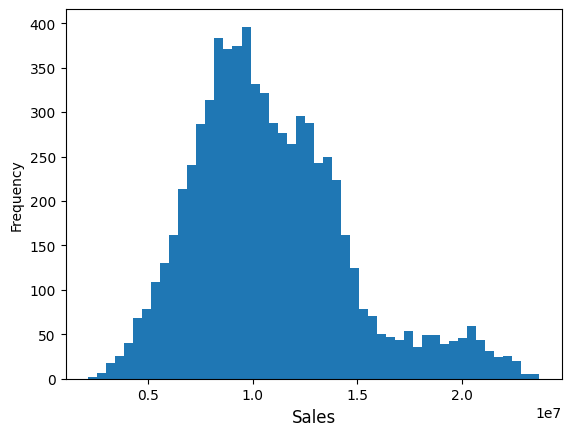

In [13]:
## target variable

df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales', fontsize=12)

- The distribution of the target variable is slightly right skewed.
- We can see a small number of houses with a very high price.

<Axes: ylabel='Frequency'>

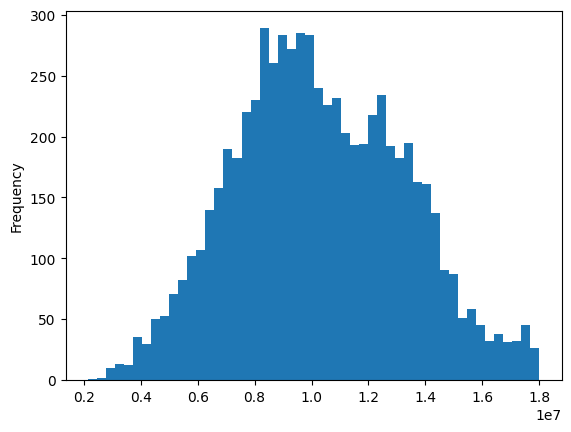

In [14]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in sq feet')

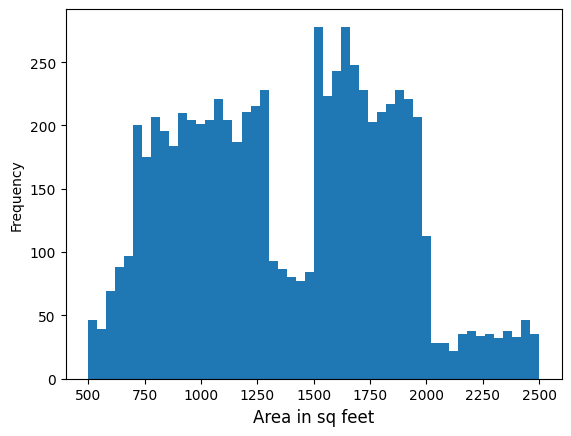

In [15]:
## Area of house in Square feet

df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize=12)

- Most houses have the area between **750 sq feet to 1250 sq feet** or around **1500 sq feet to 2000 sq feet**
- Very less number of houses have area more than 2000 sq feet or less than 750 sq feet

### Value counts

In [16]:
# number of bedrooms

df['N_BEDROOM'].value_counts()

,count
N_BEDROOM,
1.0,3795
2.0,2352
3.0,707
4.0,254


- It has four different categories
- This variable should be object and not integer

In [17]:
df['N_BEDROOM'].value_counts()/len(df)*100

,count
N_BEDROOM,
1.0,53.383036
2.0,33.084822
3.0,9.945140
4.0,3.572936


- About 53% houses have one bedroom
- 33% have 2 bedrooms
- Less than 10% houses have 3 bedrooms
- Only 3.5% have 4 bedrooms

In [18]:
df['N_ROOM'].value_counts()

,count
N_ROOM,
4,2563
3,2125
5,1246
2,921
6,254


- The 'Rooms' might have number of kitchen, hall, dinning area etc.
- No house with 1 room, and a very few that have 2

In [19]:
df['N_BATHROOM'].value_counts()/len(df)

,count
N_BATHROOM,
1.0,0.786187
2.0,0.213110


- 78% houses have 1 bathroom and 21% have 2 bathrooms
- The same can be represented using bar plots

### Bar Plot

<Axes: xlabel='N_BATHROOM'>

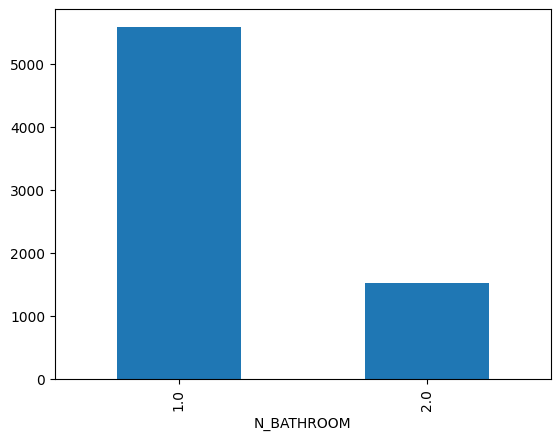

In [20]:
df['N_BATHROOM'].value_counts().plot(kind = 'bar')

<Axes: xlabel='AREA'>

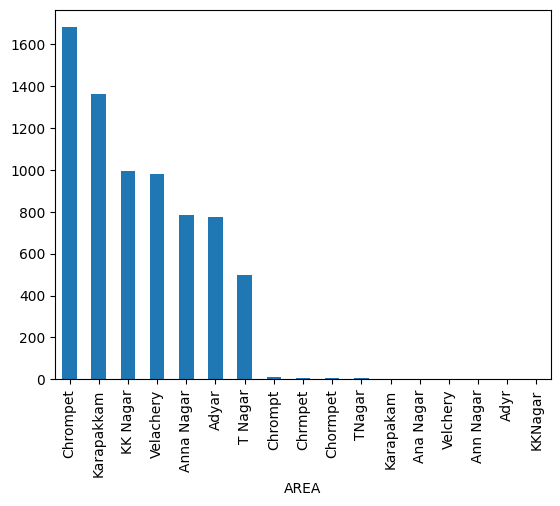

In [21]:
df['AREA'].value_counts().plot(kind = 'bar')

- There are 17 different categories in the 'AREA' variable
- Only 7 unique area name
- maximum houses are in the area Chrompet, followed by Karapakkam

<Axes: xlabel='PARK_FACIL'>

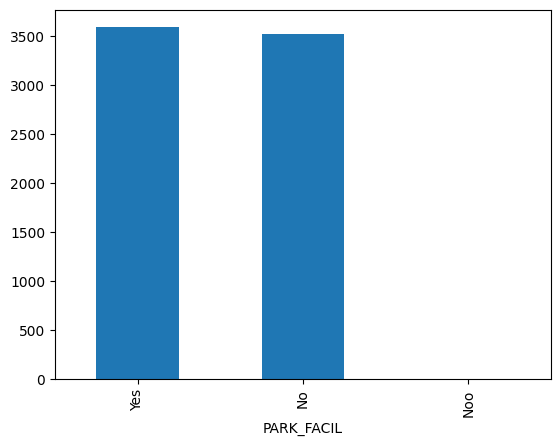

In [22]:
# houses with parking facility

df['PARK_FACIL'].value_counts().plot(kind = 'bar')

In [23]:
df['PARK_FACIL'].value_counts()

,count
PARK_FACIL,
Yes,3587
No,3520
Noo,2


- There are only two unique categories
- The number of houses with parking facility in both the cases is almost the same

# Data Manipulation


1. Drop Duplicates (if any)
2. Fill the missing Values
3. Correct the data types
4. Fix the spelling errors in variables

### Drop Duplicates (if any)

In [24]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [25]:
df.drop_duplicates(subset=['AREA']).shape

(17, 19)

In [26]:
df.shape

(7109, 19)

- We have no duplicates. Hence the shape did not change here.

### Missing Values

In [27]:
# missing values

df.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DIST_MAINROAD,0
N_BEDROOM,1
N_BATHROOM,5
N_ROOM,0
SALE_COND,0
PARK_FACIL,0
BUILDTYPE,0


**Different ways deal with the missing values**

- Remove the rows with missing values
- Mean or median in case of continuous variable
- With mode in case of categorical variable
- Using other independent variables

### Drop rows with missing values

In [28]:
df.dropna(axis=0, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


- To make changes to original data, use inplace=True
- In this case, 54 rows removed

In [29]:
df.dropna(axis=1, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


- When axis is set to 1, columns are dropped.
- For given data, 3 columns has missing values hence three columns dropped
- To avoid loss of data, we can use other ways of imputation

#### 1. N_BEDROOM

In [30]:
df['N_BEDROOM'].mode()

,N_BEDROOM
0,1.0


In [31]:
df['N_BEDROOM'].fillna(value = (df['N_BEDROOM'].mode()[0]), inplace=True)

#### 2. N_BATHROOM

In [32]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [33]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else:
            df['N_BATHROOM'][i] = 2.0

<ipython-input-33-5cc00e0cfe07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i] = 1.0
<ipython-input-33-5cc00e0cfe07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i] = 1.0
<ipython-input-33-5cc00e0cfe07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i] = 1.0
<ipython-input-33-5cc00e0cfe07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

#### 3. QS_OVERALL

In [34]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [35]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], temp], axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


- Imputing missing values with the help of other 'quality score' columns
- Additionally we can assign higher weights to n_bedroom and lower to n_bathroom

In [36]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [37]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [38]:
df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [39]:
df.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DIST_MAINROAD,0
N_BEDROOM,0
N_BATHROOM,0
N_ROOM,0
SALE_COND,0
PARK_FACIL,0
BUILDTYPE,0


### Data Types

In [40]:
df.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object
BUILDTYPE,object


In [41]:
# data type of n_bedroom, n_room, n_bathroom

df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

### Replace categories

In [42]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in AREA ************
AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64

************ Value Count in N_BEDROOM ************
N_BEDROOM
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: count, dtype: int64

************ Value Count in N_BATHROOM ************
N_BATHROOM
1.0    5593
2.0    1516
Name: count, dtype: int64

************ Value Count in N_ROOM ************
N_ROOM
4    2563
3    2125
5    1246
2     921
6     254
Name: count, dtype: int64

************ Value Count in SALE_COND ************
SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall        

**Update names in column**
- AREA
- SALE_COND
- PARK_FACIL
- BUILDTYPE
- UTILITY_AVAIL
- STREET

In [43]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
df['PARK_FACIL'].value_counts()

,count
PARK_FACIL,
Yes,3587
No,3522


In [44]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)

In [45]:
df['AREA'].value_counts()

,count
AREA,
Chrompet,1702
Karapakkam,1366
KK Nagar,997
Velachery,981
Anna Nagar,788
Adyar,774
T Nagar,501


In [46]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial',
                         'Adj Land': 'AdjLand',
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

,count
SALE_COND,
AdjLand,1439
Partial,1433
Normal Sale,1423
AbNormal,1411
Family,1403


In [47]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)


# BIVARIATE ANALYSIS

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


In [48]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

## Hypothesis -
 - Sales price should increase with increase in interior square feet
 - The sales price would depend on the area where house is located
 - Higher the number of rooms, bathrooms in the house, more should be the price

  
## 1. House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
   - BUILDTYPE – The type of building

**1. Interior area and sales price (target)**

<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

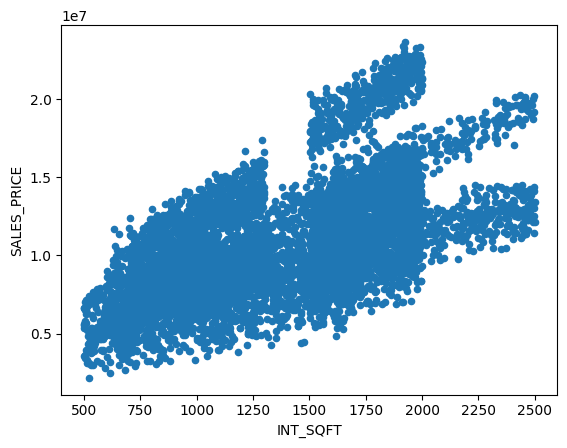

In [49]:
# interior area and sales price (target)

df.plot.scatter('INT_SQFT','SALES_PRICE')

- A very clear linear relationship can be seen between the interior area and sales price
- These variables have a positive correlation

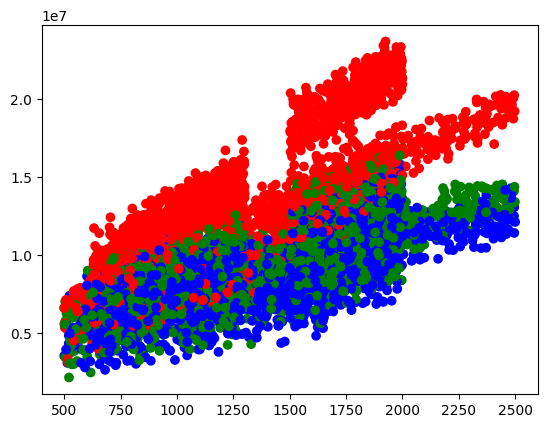

In [50]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

** 2. Sales Price against no of bedroom and bathroom**

In [51]:
# sale price of houses wrt number of bedrooms and bathroomms
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


**3. QS_OVERALL and sales price **

<Axes: xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

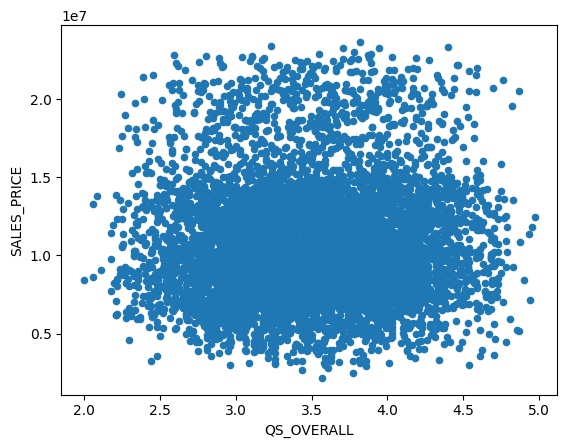

In [52]:
#QS_OVERALL and sales price

df.plot.scatter('QS_OVERALL', 'SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

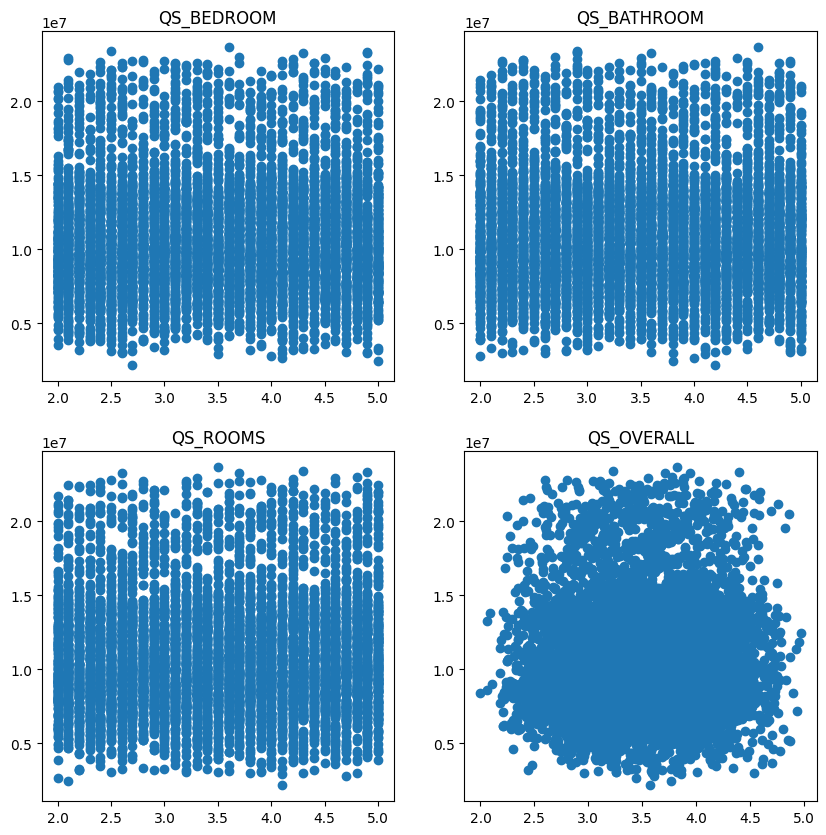

In [53]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')



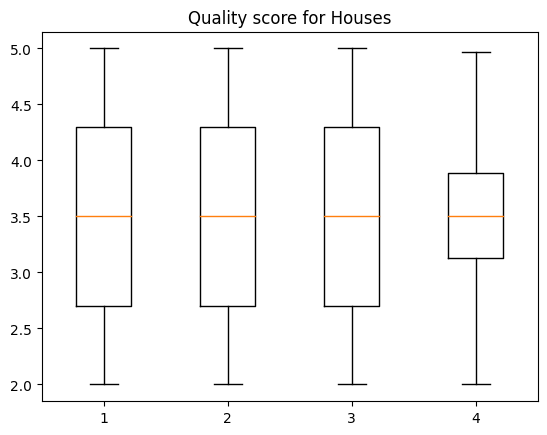

In [54]:
# Create an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# Create the boxplot
bp = ax.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])


- Distribution of number of houses in each quartile is same for 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM'
- For QS_OVERALL, 50 % of values lie in a very small range of ~3.2 to 3.7 score

** 4. Building type and sales price**

In [55]:
# SALE PRICE based on building type

df.groupby('BUILDTYPE').SALES_PRICE.median()

,SALES_PRICE
BUILDTYPE,
Commercial,13356200.0
House,8985370.0
Others,9637260.0


- Houses built for commercial purposes have a considerably higher sale price
- Houses with additional facility should have higher price

<Axes: ylabel='Frequency'>

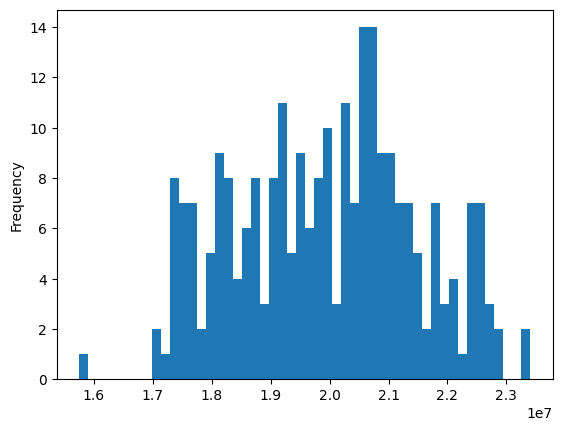

In [56]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

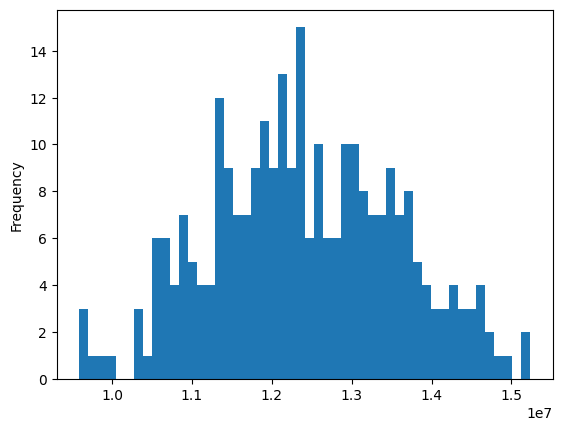

In [57]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
   - STREET
   - MZZONE  

**5. Building type and parking facility**

In [58]:
# building type and parking facility

df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985.0
            Yes           13920600.0
House       No             8514140.0
            Yes            9468150.0
Others      No             9104645.0
            Yes           10039405.0
Name: SALES_PRICE, dtype: float64

- For all three categories, houses with park facility have a higher price
- we can use groupby function to generate a plot for better comparison

<Axes: xlabel='BUILDTYPE,PARK_FACIL'>

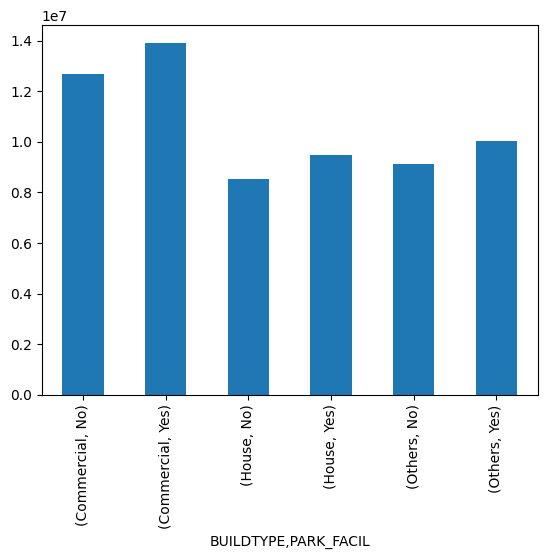

In [59]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

**6. Area-wise price for houses**

In [60]:
# average price for each area category

df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350.0
Anna Nagar,13727895.0
Chrompet,9606725.0
KK Nagar,12146740.0
Karapakkam,7043125.0
T Nagar,14049650.0
Velachery,10494410.0


- Anna Nagar and T Nagar are comparatively more expensive
- The least priced are among the 7 is karapakkam

<Axes: ylabel='Frequency'>

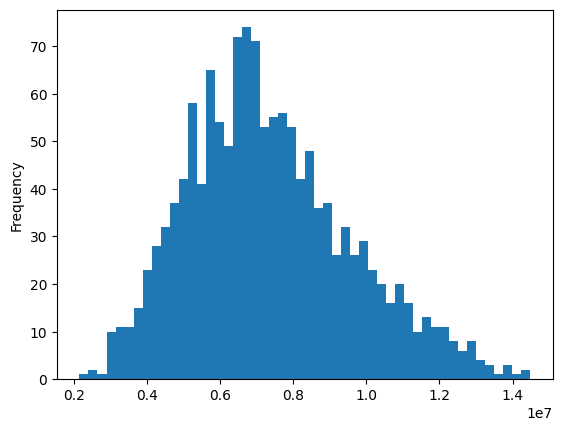

In [61]:
temp_df = df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

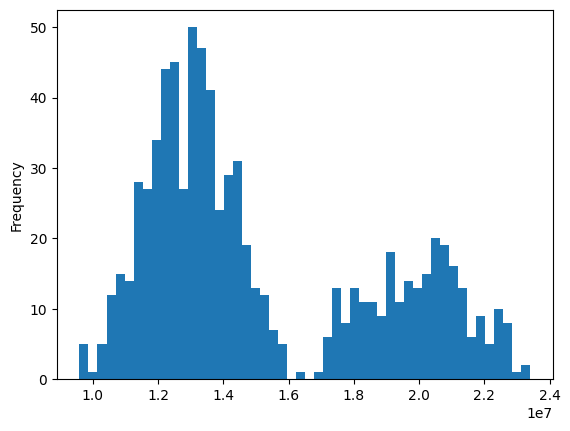

In [62]:
temp_df = df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

**7. Distance from main road **

<Axes: xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

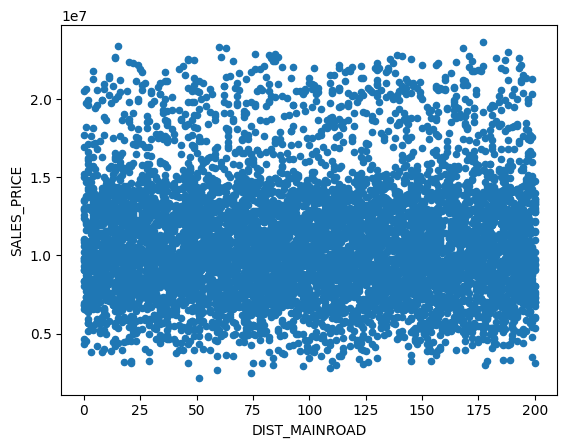

In [63]:
df.plot.scatter('DIST_MAINROAD', 'SALES_PRICE')

**8. Type of street around the house**

In [64]:
df.groupby(['STREET']).SALES_PRICE.median()

,SALES_PRICE
STREET,
Gravel,10847225.0
No Access,9406050.0
Paved,10470070.0


- Both gravel and paved roads have approximately same sale price
- Houses marked with 'no access' have a lower sale price

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


<Axes: xlabel='SALES_PRICE', ylabel='COMMIS'>

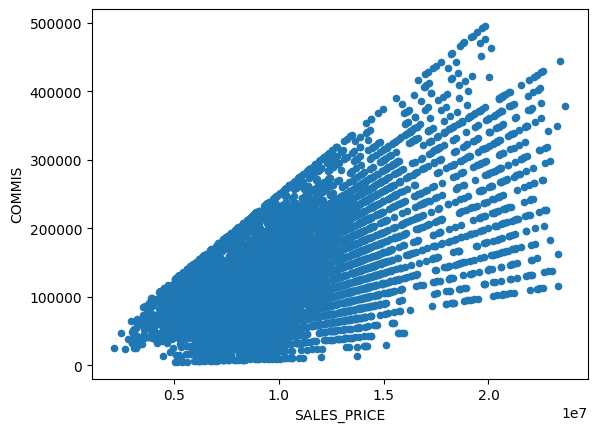

In [65]:
# commission and sales price

df.plot.scatter('SALES_PRICE', 'COMMIS')

In [66]:
df[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


## Linear Regression Model

In [67]:
df.drop(['PRT_ID'], axis=1, inplace = True)

In [68]:
df = pd.get_dummies(df)

In [69]:
x = df.drop('SALES_PRICE', axis=1)
y= df['SALES_PRICE']

### Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4976, 48), (2133, 48), (4976,), (2133,))

### Model Building &  Evaluation - LRMSE and R-squared

In [71]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error


rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('gb', gb_model), ('svr', svr_model)])
ensemble_model.fit(train_x, train_y)
ensemble_predictions = ensemble_model.predict(test_x)

print("Ensemble Model Evaluation:")
pred_test = ensemble_model.predict(test_x)
test_score=np.sqrt(mean_squared_log_error(test_y,pred_test))
print("test-error: ",test_score)
print("R-squared (R2):", r2_score(test_y, ensemble_predictions))

Ensemble Model Evaluation:
test-error:  0.13911668051891074
R-squared (R2): 0.8670717793967565


In [72]:
#Sample Data
some_data = x.iloc[0:5]
some_labels = y.iloc[0:5]

In [73]:
some_data

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,4.0,3.9,4.9,4.330,144400,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,1986,26,4.9,4.2,2.5,3.765,304049,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2,909,70,4.1,3.8,2.2,3.090,92114,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,1855,14,4.7,3.9,3.6,4.010,77042,False,False,False,...,True,False,False,True,False,False,True,False,False,False
4,1226,84,3.0,2.5,4.1,3.290,74063,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [74]:
some_data.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'COMMIS', 'AREA_Adyar', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'N_BEDROOM_1.0', 'N_BEDROOM_2.0', 'N_BEDROOM_3.0',
       'N_BEDROOM_4.0', 'N_BATHROOM_1.0', 'N_BATHROOM_2.0', 'N_ROOM_2',
       'N_ROOM_3', 'N_ROOM_4', 'N_ROOM_5', 'N_ROOM_6', 'SALE_COND_AbNormal',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'PARK_FACIL_No', 'PARK_FACIL_Yes',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'UTILITY_AVAIL_AllPub', 'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa',
       'UTILITY_AVAIL_NoSewr ', 'STREET_Gravel', 'STREET_No Access',
       'STREET_Paved', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH',
       'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

In [100]:
pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick


In [75]:
some_labels

,SALES_PRICE
0,7600000
1,21717770
2,13159200
3,9630290
4,7406250


In [76]:
ensemble_model.predict(some_data)

array([ 8730423.96359485, 17620509.74717929, 11847134.91215726,
        9718545.31088696,  8118863.42895392])

In [ ]:
list(some_labels)

[7600000, 21717770, 13159200, 9630290, 7406250]

In [78]:
import pickle
pickle.dump(ensemble_model,open('Hmodel.pkl','wb'))

In [80]:
pickled_model=pickle.load(open('Hmodel.pkl','rb'))

In [89]:


pickled_model.predict(some_data.iloc[0].values.reshape(1,-1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([8730423.96359485])

In [101]:

#Comments----------------------------------------------------------------------------------------------

In [ ]:
#import joblib
#joblib.dump(ensemble_model, 'ensemble_model.h5')



In [ ]:
from joblib import dump, load
dump(ensemble_model, "House_price_prediction.joblib")



['House_price_prediction.joblib']

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Estate/chennai_house_price_prediction.csv")

In [ ]:
df1.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [ ]:
import pandas as pd
import numpy as np
import sklearn

# Define the input attributes (replace with your input values)
input_data = {
    'INT_SQFT': 1500,
    'DIST_MAINROAD': 200,
    'N_BEDROOM': 3,
    'N_BATHROOM': 2,
    'N_ROOM': 5,
    'QS_ROOMS': 4,
    'QS_BATHROOM': 3,
    'QS_BEDROOM': 4,
    'QS_OVERALL': 4.2,
    'COMMIS': 5000,
    'AREA': 'AREA_Adyar',
    'SALE_COND': 'SALE_COND_AbNormal',
    'PARK_FACIL': 'PARK_FACIL_No',
    'BUILDTYPE': 'BUILDTYPE_Commercial',
    'UTILITY_AVAIL': 'UTILITY_AVAIL_AllPub',
    'STREET': 'STREET_Gravel',
    'MZZONE': 'MZZONE_A'
}

# Define the categorical attribute names (for binary encoding)
categorical_attributes = ['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']

# Define the unique values for each categorical attribute
unique_values = {
    'N_BEDROOM': [1, 2, 3, 4],
    'N_BATHROOM': [1, 2],
    'N_ROOM': [2, 3, 4, 5, 6],
    'AREA': ['AREA_Adyar', 'AREA_Anna_Nagar', 'AREA_Chrompet', 'AREA_KK_Nagar', 'AREA_Karapakkam', 'AREA_T_Nagar', 'AREA_Velachery'],
    'SALE_COND': ['SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal_Sale', 'SALE_COND_Partial'],
    'PARK_FACIL': ['PARK_FACIL_No', 'PARK_FACIL_Yes'],
    'BUILDTYPE': ['BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
    'UTILITY_AVAIL': ['UTILITY_AVAIL_AllPub', 'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa', 'UTILITY_AVAIL_NoSewr'],
    'STREET': ['STREET_Gravel', 'STREET_No_Access', 'STREET_Paved'],
    'MZZONE': ['MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM']
}

# Create a DataFrame from the input data
data = pd.DataFrame([input_data])

# Create binary encoded columns for categorical attributes
binary_encoded_data = pd.DataFrame()

for attribute in categorical_attributes:
    for value in unique_values[attribute]:
        binary_encoded_data[f'{attribute}_{value}'] = np.where(data[attribute] == value, 1, 0)

# Define the generated attribute names (48 in total)
generated_attributes = ['INT_SQFT', 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
                        'QS_OVERALL', 'COMMIS'] + binary_encoded_data.columns.tolist()

# Combine binary encoded columns with the original data
final_data = pd.concat([data.drop(columns=categorical_attributes), binary_encoded_data], axis=1)[generated_attributes]

s= [np.array(final_data).reshape(-1)]
from joblib import dump, load
import numpy as np
model = load("House_price_prediction.joblib")
q= model.predict(s)

from babel.numbers import format_decimal
from decimal import Decimal

v = int(q)

value = Decimal(v)

formatted_value = format_decimal(value, locale='en_IN')

print(formatted_value)

1,29,44,190


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
a1 =final_data.INT_SQFT
a2 =final_data.DIST_MAINROAD
a3 =final_data.QS_ROOMS
a4 =final_data.QS_BATHROOM
a5 =final_data.QS_BEDROOM
a6 =final_data.QS_OVERALL
a7 =final_data.COMMIS
a8 =final_data.N_BEDROOM_1
a9 =final_data.N_BEDROOM_2
a10 =final_data.N_BEDROOM_3
a11 =final_data.N_BEDROOM_4
a12 =final_data.N_BATHROOM_1
a13 =final_data.N_BATHROOM_2
a14 =final_data.N_ROOM_2
a15 =final_data.N_ROOM_3
a16 =final_data.N_ROOM_4
a17 =final_data.N_ROOM_5
a18 =final_data.N_ROOM_6
a19 =final_data.AREA_AREA_Adyar
a20 =final_data.AREA_AREA_Anna_Nagar
a21 =final_data.AREA_AREA_Chrompet
a22 =final_data.AREA_AREA_KK_Nagar
a23 =final_data.AREA_AREA_Karapakkam
a24 =final_data.AREA_AREA_T_Nagar
a25 =final_data.AREA_AREA_Velachery
a26 =final_data.SALE_COND_SALE_COND_AbNormal
a27 =final_data.SALE_COND_SALE_COND_AdjLand
a28 =final_data.SALE_COND_SALE_COND_Family
a29 =final_data.SALE_COND_SALE_COND_Normal_Sale
a30 =final_data.SALE_COND_SALE_COND_Partial
a31 =final_data.PARK_FACIL_PARK_FACIL_No
a32 =final_data.PARK_FACIL_PARK_FACIL_Yes
a33 =final_data.BUILDTYPE_BUILDTYPE_Commercial
a34 =final_data.BUILDTYPE_BUILDTYPE_House
a35 =final_data.BUILDTYPE_BUILDTYPE_Others
a36 =final_data.UTILITY_AVAIL_UTILITY_AVAIL_AllPub
a37 =final_data.UTILITY_AVAIL_UTILITY_AVAIL_ELO
a38 =final_data.UTILITY_AVAIL_UTILITY_AVAIL_NoSeWa
a39 =final_data.UTILITY_AVAIL_UTILITY_AVAIL_NoSewr
a40 =final_data.STREET_STREET_Gravel
a41 =final_data.STREET_STREET_No_Access
a42 =final_data.STREET_STREET_Paved
a43 =final_data.MZZONE_MZZONE_A
a44 =final_data.MZZONE_MZZONE_C
a45 =final_data.MZZONE_MZZONE_I
a46 =final_data.MZZONE_MZZONE_RH
a47 =final_data.MZZONE_MZZONE_RL
a48 =final_data.MZZONE_MZZONE_RM

In [ ]:
arr = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10,
          a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
          a21, a22, a23, a24, a25, a26, a27, a28, a29, a30,
          a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
          a41, a42, a43, a44, a45, a46, a47, a48]

In [ ]:
arr = np.array(arr)

In [ ]:
arr = [arr.reshape(-1)]

In [ ]:
s= [np.array(final_data).reshape(-1)]

In [ ]:
from joblib import dump, load
import numpy as np
model = load("House_price_prediction.joblib")
model.predict(s)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([12944190.99066796])

In [ ]:
arr

[array([1.5e+03, 2.0e+02, 4.0e+00, 3.0e+00, 4.0e+00, 4.2e+00, 5.0e+03,
        0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00])]

In [ ]:
s

[array([1.5e+03, 2.0e+02, 4.0e+00, 3.0e+00, 4.0e+00, 4.2e+00, 5.0e+03,
        0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00])]

In [ ]:
q= model.predict(s)

In [ ]:
pip install babel

In [ ]:
from babel.numbers import format_decimal
from decimal import Decimal

v = int(q)

value = Decimal(v)

formatted_value = format_decimal(value, locale='en_IN')

print(formatted_value)
